In [41]:
import numpy as np
import sys, json, copy, time, pickle, random
import matplotlib.pyplot as plt
from scipy.stats import sem, unitary_group
import CB_process
import itertools
# from qiskit.compiler import transpile

#Change test

use_density_matrix = False # density matrix based / measurement based simulation

# filename_label = 'simulation_intc_20221024_0400617335' #exp1
filename_label = 'simulation_intc_20221024_1856566799' #exp3

with open('data/' + filename_label + '_full', 'rb') as infile:
    data = pickle.load(infile)
token = data["token"]

result = {}

############# exp 3: intc_CB

# parity_pauli_sample_list = [('XX',0),('IX',1),('ZZ',0),('ZI',1)]
parity_pauli_sample_list = [('ZZ',0),('ZI',1)]
cb = data['intc_cb']

use_boostrap = False
shots_max = 0

s_list = {}

In [37]:
C_max = 30

In [38]:

# # fidelity_list = {} 
# # stdev_list = {}
# # intercept_list = {}
# # intercept_std_list = {}
# # covar_list = {}
# params_list = {}
# pcov_list = {}

# for tag in cb:
#     print(tag)
#     cb_data = cb[tag]
#     n = cb_data["parameters"]['n']
#     n_total = cb_data["parameters"]['n_total']
#     shots = cb_data["parameters"]['shots']
#     Lrange = cb_data["parameters"]['Lrange']

#     print(Lrange)

#     C = cb_data["parameters"]['C']
#     repeat = cb_data["parameters"]['repeat']
#     pauli_sample = cb_data["parameters"]['pauli']
#     parity = cb_data["parameters"]['parity']

#     cb_result = CB_process.process_CB(n, C, shots, 1, Lrange, cb_data, pauli_sample = pauli_sample,repeat=repeat, periodic=True,use_density_matrix=use_density_matrix,intercept_cb=True,C_max=C_max,shots_max=shots_max,use_boostrap=use_boostrap)
#     raw_fidelity_list = cb_result["fidelity_list"]


#     for sub_label in raw_fidelity_list.keys():
#         if (sub_label,parity) in params_list:
#             continue
#         elif(sub_label == 'I'*n):
#             params_list = np.array([1.0,1.0])
#             pcov_list = np.array([[0.0,0.0],[0.0,0.0]])
#         else:
#             params, pcov = CB_process.fit_CB_all(Lrange, raw_fidelity_list[sub_label])
#             params_list[(sub_label,parity)] = params
#             pcov_list[(sub_label,parity)] = pcov
#             # note: parameters = (intercept, slope)

# noise_after_the_gate = True
# dec_fidelity_list = {}
# dec_stdev_list = {}
# for k in range(0,len(parity_pauli_sample_list),2):
#     pp1 = parity_pauli_sample_list[k]
#     pp2 = parity_pauli_sample_list[k+1]
#     # f = (fidelity_list[pp1]+fidelity_list[pp2])/2
#     # r = (intercept_list[pp2]/intercept_list[pp1])
#     f = (params_list[pp1][1] + params_list[pp2][1])/2
#     r = (params_list[pp2][0]/params_list[pp1][0])
#     if noise_after_the_gate is True:
#         lambda1 = f * r
#         lambda2 = f / r
#     else:
#         lambda1 = f / r
#         lambda2 = f * r
#     # propagation of uncertainty
#     s1, s2 =  CB_process.calculate_uncertainty(params_list[pp1],params_list[pp2],pcov_list[pp1],pcov_list[pp1])

#     dec_fidelity_list[pp1[0]] = lambda1
#     dec_fidelity_list[pp2[0]] = lambda2
#     dec_stdev_list[pp1[0]] = s1
#     dec_stdev_list[pp2[0]] = s2

# print("Label / Pauli infidelity / Std(fidelity) / Intercept / Std(intercept)")
# for pauli_label in parity_pauli_sample_list:
#     print(str(pauli_label)+" %.5f %.5f %.5f %.5f"%(1-params_list[pauli_label][1], np.sqrt(pcov_list[pauli_label][1,1]), 1-params_list[pauli_label][0], np.sqrt(pcov_list[pauli_label][0,0])))


# print("Label / Pauli infidelity (decoupled)/ Std")
# for pauli_label in parity_pauli_sample_list:
#     print(str(pauli_label[0])+" %.5f %.5f"%(1-dec_fidelity_list[pauli_label[0]],dec_stdev_list[pauli_label[0]]))

# result['intc_cb'] = {
#     "params":       params_list,
#     "pcov":         pcov_list,
#     "dec_fidelity": dec_fidelity_list,
#     "dec_stdev":    dec_stdev_list,
#     "n":            n,
#     "n_total":      n_total,
#     "Lrange":       Lrange,
#     "C":            C,
#     "shots":        shots,
#     "batch":        1,
#     "repeat":       repeat,
#     "parity_pauli_sample_list": parity_pauli_sample_list
# }

# # filename = 'data/' + filename_label + '_result'
# # with open(filename, 'wb') as outfile:
# #     pickle.dump(result, outfile)

# # s_list[C_max] = dec_stdev_list['ZZ']
# # print(s_list[C_max])

intc_cb_ZZ
[1, 2, 4, 8, 16, 32]
intc_cb_ZI
[2, 3, 5, 9, 17, 33]
Label / Pauli infidelity / Std(fidelity) / Intercept / Std(intercept)
('ZZ', 0) 0.00768 0.00016 0.00140 0.00086
('ZI', 1) 0.00742 0.00015 0.00555 0.00113
Label / Pauli infidelity (decoupled)/ Std
ZZ 0.01167 0.00121
ZI 0.00341 0.00122


In [88]:
# 6 x 50 circuits
#
# intc_cb_ZZ
# intc_cb_ZI
# Label / Pauli infidelity / Std(fidelity) / Intercept / Std(intercept)
# ('ZZ', 0) 0.00769 0.00014 0.00076 0.00076
# ('ZI', 1) 0.00732 0.00011 0.00481 0.00059
# Label / Pauli infidelity (decoupled)/ Std
# ZZ 0.01153 0.00107
# ZI 0.00347 0.00108

In [131]:
s_list

{10: 0.002454589469131299,
 20: 0.0013055155261895211,
 30: 0.0012124440616752593,
 40: 0.0010825709579309324,
 50: 0.0009143207075018747}

In [53]:
C_max = 30

In [54]:

# fidelity_list = {} 
# stdev_list = {}
# intercept_list = {}
# intercept_std_list = {}
# covar_list = {}
params_list = {}
pcov_list = {}

all_f = {}

for tag in cb:
    print(tag)
    cb_data = cb[tag]
    n = cb_data["parameters"]['n']
    n_total = cb_data["parameters"]['n_total']
    shots = cb_data["parameters"]['shots']
    Lrange = cb_data["parameters"]['Lrange']
    C = cb_data["parameters"]['C']
    repeat = cb_data["parameters"]['repeat']
    pauli_sample = cb_data["parameters"]['pauli']
    parity = cb_data["parameters"]['parity']

    cb_result = CB_process.process_CB(n, C, shots, 1, Lrange, cb_data, pauli_sample = pauli_sample,repeat=repeat, periodic=True,use_density_matrix=use_density_matrix,intercept_cb=True,C_max=C_max,shots_max=shots_max,use_boostrap=use_boostrap)
    raw_fidelity_list = cb_result["fidelity_list"]

    all_f[list(raw_fidelity_list.keys())[0]] = list(raw_fidelity_list.values())[0]


intc_cb_ZZ
intc_cb_ZI


In [55]:
ave_f = {}
sem_f = {}

ave_f[0] = np.mean(all_f['ZZ'][0][0:C_max*6])
sem_f[0] = sem(all_f['ZZ'][0][0:C_max*6])

ave_f[1] = np.mean(all_f['ZI'][1][0:C_max*6])
sem_f[1] = sem(all_f['ZI'][1][0:C_max*6])

In [56]:
ave_f, sem_f

({0: 0.9962333333333332, 1: 0.9865999999999998},
 {0: 0.0004002393919658912, 1: 0.0011382583994454195})

In [57]:
1 - ave_f[1]/ave_f[0], np.sqrt(sem_f[1]**2/ave_f[0]**2 + sem_f[0]**2*ave_f[1]**2/ave_f[1]**4)


(0.009669756081239433, 0.0012124440616752593)

In [58]:

s_list[C_max] = np.sqrt(sem_f[1]**2/ave_f[0]**2 + sem_f[0]**2*ave_f[1]**2/ave_f[1]**4)

In [129]:

#     for sub_label in raw_fidelity_list.keys():
#         if (sub_label,parity) in params_list:
#             continue
#         elif(sub_label == 'I'*n):
#             params_list = np.array([1.0,1.0])
#             pcov_list = np.array([[0.0,0.0],[0.0,0.0]])
#         else:
#             params, pcov = CB_process.fit_CB_all(Lrange, raw_fidelity_list[sub_label])
#             params_list[(sub_label,parity)] = params
#             pcov_list[(sub_label,parity)] = pcov
#             # note: parameters = (intercept, slope)

# noise_after_the_gate = True
# dec_fidelity_list = {}
# dec_stdev_list = {}
# for k in range(0,len(parity_pauli_sample_list),2):
#     pp1 = parity_pauli_sample_list[k]
#     pp2 = parity_pauli_sample_list[k+1]
#     # f = (fidelity_list[pp1]+fidelity_list[pp2])/2
#     # r = (intercept_list[pp2]/intercept_list[pp1])
#     f = (params_list[pp1][1] + params_list[pp2][1])/2
#     r = (params_list[pp2][0]/params_list[pp1][0])
#     if noise_after_the_gate is True:
#         lambda1 = f * r
#         lambda2 = f / r
#     else:
#         lambda1 = f / r
#         lambda2 = f * r
#     # propagation of uncertainty
#     s1, s2 =  CB_process.calculate_uncertainty(params_list[pp1],params_list[pp2],pcov_list[pp1],pcov_list[pp1])

#     dec_fidelity_list[pp1[0]] = lambda1
#     dec_fidelity_list[pp2[0]] = lambda2
#     dec_stdev_list[pp1[0]] = s1
#     dec_stdev_list[pp2[0]] = s2

# print("Label / Pauli infidelity / Std(fidelity) / Intercept / Std(intercept)")
# for pauli_label in parity_pauli_sample_list:
#     print(str(pauli_label)+" %.5f %.5f %.5f %.5f"%(1-params_list[pauli_label][1], np.sqrt(pcov_list[pauli_label][1,1]), 1-params_list[pauli_label][0], np.sqrt(pcov_list[pauli_label][0,0])))


# print("Label / Pauli infidelity (decoupled)/ Std")
# for pauli_label in parity_pauli_sample_list:
#     print(str(pauli_label[0])+" %.5f %.5f"%(1-dec_fidelity_list[pauli_label[0]],dec_stdev_list[pauli_label[0]]))

# result['intc_cb'] = {
#     "params":       params_list,
#     "pcov":         pcov_list,
#     "dec_fidelity": dec_fidelity_list,
#     "dec_stdev":    dec_stdev_list,
#     "n":            n,
#     "n_total":      n_total,
#     "Lrange":       Lrange,
#     "C":            C,
#     "shots":        shots,
#     "batch":        1,
#     "repeat":       repeat,
#     "parity_pauli_sample_list": parity_pauli_sample_list
# }

# # filename = 'data/' + filename_label + '_result'
# # with open(filename, 'wb') as outfile:
# #     pickle.dump(result, outfile)


In [34]:
#data 6 depths
s6 = {10: 0.0016754429306812587,
 20: 0.0012024967716552553,
 30: 0.0012069420859954377,
 40: 0.0010705637067439536,
 50: 0.0009669370130978098}

In [35]:
#data 1 step
s1 = {10: 0.002454589469131299,
 20: 0.0013055155261895211,
 30: 0.0012124440616752593,
 40: 0.0010825709579309324,
 50: 0.0009143207075018747}

Text(0.5, 1.0, 'Intercept CB vs. 1-depth')

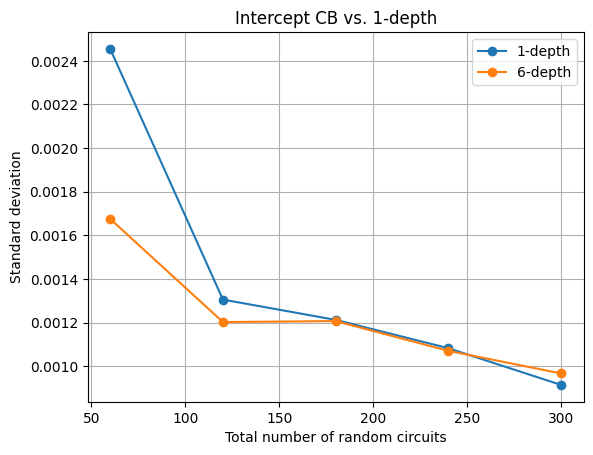

In [36]:
plt.figure()
plt.grid(True)
C = [6*x for x in [10,20,30,40,50]]
plt.plot(C, list(s1.values()), marker = 'o')
plt.plot(C, list(s6.values()), marker = 'o')
plt.legend(["1-depth","6-depth"])
plt.xlabel("Total number of random circuits")
plt.ylabel("Standard deviation")
plt.title("Intercept CB vs. 1-depth")